In [ ]:
รายชื่อ 
สมาชิก 404-418-427-430-445-446

In [15]:
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import talib 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.compose import make_column_transformer
plt.style.use('fivethirtyeight') #styling graph
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [565]:
Index = pdr.get_data_yahoo("000001.SS", start="2016-01-01", end="2019-12-31")
Index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109
...,...,...,...,...,...,...
2019-12-25,2988.291992,2970.656982,2980.427979,2981.881104,175700,2981.881104
2019-12-26,3007.354980,2980.396973,2981.249023,3007.354980,182400,3007.354980
2019-12-27,3036.113037,3003.631104,3006.852051,3005.035889,247100,3005.035889


In [566]:
#indicator
close = Index['Close']
high = Index['High']
low =  Index['Low']
#BBANDS
upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=13, nbdevup=2, nbdevdn=2, matype=0)
Index['up'] = upperband
Index['middle'] = middleband
Index['lower'] = lowerband
#MACD
macd, macdsignal, macdhist = talib.MACD(close, fastperiod=13, slowperiod=26, signalperiod=9)
Index['macd'] = macd
Index['macdsignal'] = macdsignal
Index['macdhist'] = macdhist
#Aroon
aroondown, aroonup = talib.AROON(high, low, timeperiod=14)
Index['aroondown'] = aroondown
Index['aroonup'] = aroonup
#ADX
ADX = talib.ADX(high, low, close, timeperiod=14)
Index['ADX'] = ADX
#ATR
ATR = talib.ATR(high, low, close, timeperiod=14)
Index['ADX'] = ATR
Index

,High,Low,Open,Close,Volume,Adj Close,up,middle,lower,macd,macdsignal,macdhist,aroondown,aroonup,ADX
Date,,,,,,,,,,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,2988.291992,2970.656982,2980.427979,2981.881104,175700,2981.881104,3048.360929,2970.212384,2892.063838,17.752478,12.736986,5.015491,0.000000,57.142857,26.694833
2019-12-26,3007.354980,2980.396973,2981.249023,3007.354980,182400,3007.354980,3050.648783,2977.356765,2904.064746,18.984990,13.986587,4.998403,0.000000,50.000000,26.713631
2019-12-27,3036.113037,3003.631104,3006.852051,3005.035889,247100,3005.035889,3049.801694,2984.104455,2918.407216,19.602761,15.109822,4.492939,7.142857,42.857143,27.125652


In [567]:
#Calculate Missing Data
Index.isnull().sum()

High           0
Low            0
Open           0
Close          0
Volume         0
Adj Close      0
up            12
middle        12
lower         12
macd          33
macdsignal    33
macdhist      33
aroondown     14
aroonup       14
ADX           14
dtype: int64

In [568]:
# #Cleasing with Average
Index=Index.fillna(Index['Close'].mean())
Index

,High,Low,Open,Close,Volume,Adj Close,up,middle,lower,macd,macdsignal,macdhist,aroondown,aroonup,ADX
Date,,,,,,,,,,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,2988.291992,2970.656982,2980.427979,2981.881104,175700,2981.881104,3048.360929,2970.212384,2892.063838,17.752478,12.736986,5.015491,0.000000,57.142857,26.694833
2019-12-26,3007.354980,2980.396973,2981.249023,3007.354980,182400,3007.354980,3050.648783,2977.356765,2904.064746,18.984990,13.986587,4.998403,0.000000,50.000000,26.713631
2019-12-27,3036.113037,3003.631104,3006.852051,3005.035889,247100,3005.035889,3049.801694,2984.104455,2918.407216,19.602761,15.109822,4.492939,7.142857,42.857143,27.125652


In [569]:
# #cleansing with Imputer
# imputer = SimpleImputer()
# cwi = make_column_transformer((imputer, ['up', 'middle', 'lower', 'macd', 'macdsignal', 'macdhist']), remainder ='passthrough')
# N225_clean = cwi.fit_transform(N225_first.iloc[:,6:])
# N225_clean

In [570]:
# Y value 
close_diff= Index['Close'].diff()
Index['up-down'] = np.where(close_diff>= 0, 1, 0)
Index

,High,Low,Open,Close,Volume,Adj Close,up,middle,lower,macd,macdsignal,macdhist,aroondown,aroonup,ADX,up-down
Date,,,,,,,,,,,,,,,,
2016-01-04,3538.688965,3295.740967,3536.589111,3296.258057,184400,3296.258057,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,0
2016-01-05,3328.138916,3189.604980,3196.650879,3287.710938,266900,3287.710938,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,0
2016-01-06,3362.974121,3288.933105,3291.195068,3361.840088,238900,3361.840088,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,1
2016-01-07,3309.656982,3115.885010,3309.656982,3125.001953,70600,3125.001953,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,0
2016-01-08,3235.450928,3056.877930,3194.625000,3186.412109,286400,3186.412109,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,3029.017930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,2988.291992,2970.656982,2980.427979,2981.881104,175700,2981.881104,3048.360929,2970.212384,2892.063838,17.752478,12.736986,5.015491,0.000000,57.142857,26.694833,0
2019-12-26,3007.354980,2980.396973,2981.249023,3007.354980,182400,3007.354980,3050.648783,2977.356765,2904.064746,18.984990,13.986587,4.998403,0.000000,50.000000,26.713631,1
2019-12-27,3036.113037,3003.631104,3006.852051,3005.035889,247100,3005.035889,3049.801694,2984.104455,2918.407216,19.602761,15.109822,4.492939,7.142857,42.857143,27.125652,0


In [571]:
#สร้างตารางที่มีเพียง คอลัม 'Close'
# data = N225_fist.filter(['Close'])
# dataset = data.values
# training_data_len = math.ceil(len(dataset)*.8)
# training_data_len
scaler = MinMaxScaler()
scaler.fit(Index)
x = scaler.transform(Index)
df = pd.DataFrame(x)  
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.955994,0.781893,0.975796,0.759651,0.221746,0.759651,0.418705,0.522489,0.596724,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
1,0.764333,0.684813,0.671634,0.751846,0.382502,0.751846,0.418705,0.522489,0.596724,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
2,0.796043,0.775666,0.756228,0.819537,0.327942,0.819537,0.418705,0.522489,0.596724,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
3,0.747509,0.617384,0.772747,0.603267,0.000000,0.603267,0.418705,0.522489,0.596724,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
4,0.679960,0.563411,0.669821,0.659344,0.420499,0.659344,0.418705,0.522489,0.596724,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.454974,0.484547,0.478167,0.472575,0.204793,0.472575,0.435910,0.463492,0.459664,0.032122,0.035585,0.016618,0.000000,0.018865,0.002191,0.0
969,0.472327,0.493456,0.478901,0.495837,0.217849,0.495837,0.437946,0.470660,0.471674,0.032518,0.035984,0.016612,0.000000,0.016507,0.002197,1.0
970,0.498505,0.514708,0.501810,0.493719,0.343920,0.493719,0.437192,0.477429,0.486028,0.032717,0.036344,0.016448,0.002358,0.014149,0.002334,0.0
971,0.503315,0.496152,0.494040,0.525669,0.345869,0.525669,0.441970,0.486351,0.498452,0.033581,0.036803,0.016855,0.000000,0.033014,0.003068,1.0


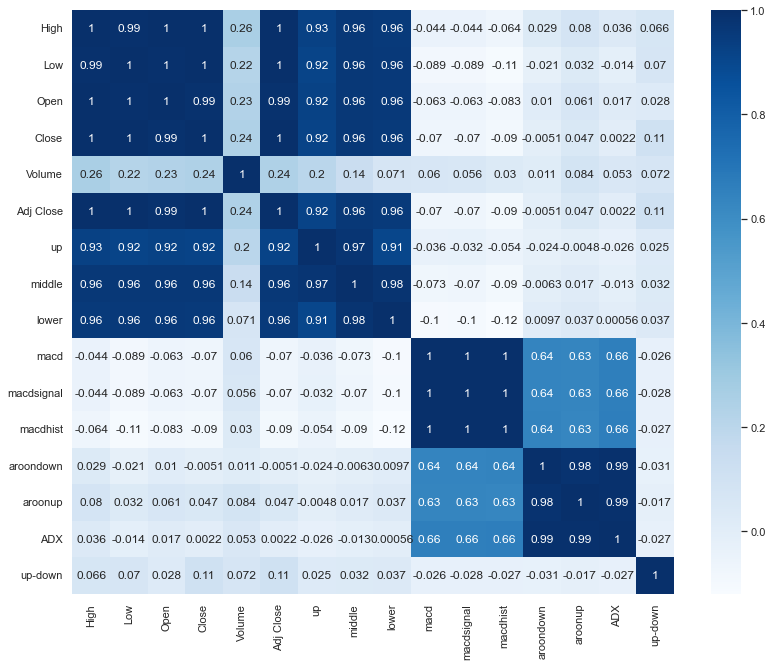

In [572]:
#Heatmap
plt.figure(figsize=(12,10))
cor = Index.corr()
sb.heatmap(cor, annot = True, cmap=plt.cm.Blues)
plt.show()

In [573]:
#RFE


In [574]:
#4 เหลี่ยม 4 อัน classification
#2 R square for regres
#Upload Bullet
X = Index.iloc[:, [6,7,8,9,10,11]].values #indicator = feature #11/12 ไม่สามารถใช้ กับ 4ปี N225
y = Index.iloc[:, -1].values #up-down จะดีกว่า /close   -1 = คอลัมสุุดท้าย

## Decision Tree

In [575]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0, shuffle = False) #test_size=0.15

In [576]:
# Visualize the data
def visualize(title, xlabel, ylabel, classifier, X_test, y_test):
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('lightblue', 'cornsilk')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [577]:
# Decision Tree Classifier: Create and Train the model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [578]:
y_pred = dtc.predict(X_test)  #Accuracy
y_pred 

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [579]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [580]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.6095890410958904


In [581]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[43, 26],
       [31, 46]], dtype=int64)

In [582]:
len(X_test)

146

In [583]:
#visualize('Decision Tree (Training Set)', 'macd', 'macdhist', dtc, X_test, y_test) 
#ติด Errorเเย่มากกกก

## Logistic Regression

In [584]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [585]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [586]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [587]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.5


In [588]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11, 58],
       [15, 62]], dtype=int64)

In [589]:
#visualize('Logistic Regression (Training Set)', 'Age', 'Estimated Salary', lr, X_test, y_test) #Error อีกเเล้ววววววว

## Random Forest

In [590]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [591]:
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [592]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [593]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.5273972602739726


In [594]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26, 43],
       [26, 51]], dtype=int64)

## MLP Artificial Neural Network (ANN)

In [595]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [596]:
# Predicting the Test set results
y_pred = mlp.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [597]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [598]:
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.4726027397260274


In [599]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[69,  0],
       [77,  0]], dtype=int64)

## Linear Regression

In [600]:
import warnings
warnings.filterwarnings('ignore')

# Generate random values as a linear function with some noise
#
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [601]:
X_regres = Index.iloc[:, [6,7,8,10,11]].values #indicator = feature
y_regres = Index.iloc[:, 3].values #up-down จะดีกว่า /close   -1 = คอลัมสุุดท้าย

In [602]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_regres , y_regres, test_size=0.15, random_state=0, shuffle = False) #test_size=0.15

In [603]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [604]:
#predict time
y_predict = model.predict(X_test)

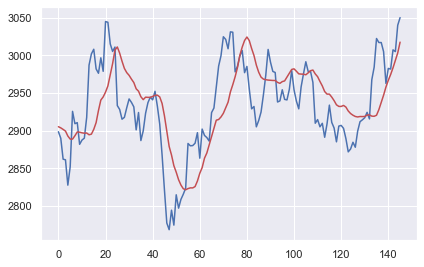

RMSE:      49.31897147578203
R2 score:  0.3168119793829022


In [605]:
X_test_len = len(X_test)
from sklearn.metrics import mean_squared_error, r2_score
plt.plot(range(X_test_len), y_test)
plt.plot(range(X_test_len), y_predict,'r');
plt.show()

rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)

print('RMSE:     ', rmse)  # Root mean squared error
print('R2 score: ', r2)
#RMFE ยิ่งน้อยยิ่งดี
#R2 score ยิ่งใกล้ 1 ยิิ่งดี
# confused matrix เสริมเพิ่มเติม

### XGBoost Regression

In [606]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE  

In [607]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [608]:
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
r2 = r2_score(y_test, pred)
print('R2 score: ', r2)

[23:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  87.481330
R2 score:  -1.1495273633947534


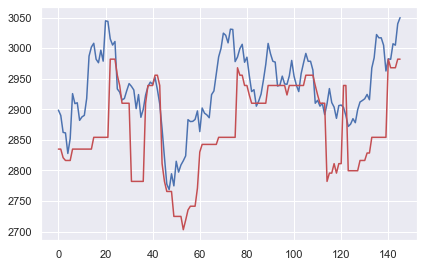

In [609]:
plt.plot(range(X_test_len), y_test)
plt.plot(range(X_test_len), pred,'r');
plt.show()

In [564]:
#00000.Index 7 ปี ใช้ 8,10, ดีมากกก
#DJI Index 7 ใช้ 8 10 ดี
#HSI 7 ใช้ 6 11
#N255 7 ใช้ 6,7,8,10,11
#